<a href="https://colab.research.google.com/github/hirofsgit/Python/blob/main/Chap6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 設定

In [ ]:
!pip install japanize-matplotlib

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns 
import japanize_matplotlib 
import math
from scipy.stats import beta
from math import factorial, log
from scipy import special, optimize
%matplotlib inline

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

# 6.1

## 表6.1

In [ ]:
y_x=[7840,1317,239,42,14,4,4,1]

ロビンスの公式

$\displaystyle E[\theta | x] = (x+1)\frac{f(x+1)}{f(x)}$

$\displaystyle \hat{f}(x) = \frac{y_x}{N}$を用いて、ロビンスの公式の推定値版

$\displaystyle \hat{E}[\theta|x]=(x+1)\frac{\hat{f}(x+1)}{\hat{f}(x)}=(x+1)\frac{y_{x+1}}{y_x}$


In [ ]:
robbins = [(i+1)*y_x[i+1]/y_x[i] for i in range(len(y_x)-1)]
robbins.append(np.NaN)

ガンマ最尤推定

$\displaystyle f_{\nu,\sigma}(x)=\frac{\gamma^{\nu+x}\Gamma(\nu + x)}{\sigma^{\nu}\Gamma(\nu)x!}$ , $\gamma = \frac{\sigma}{1+\sigma} $

尤度関数
$\displaystyle L(\nu,\sigma)=\prod_{x=0}^{x_{max}}f_{\nu,\sigma}(x) ^{y_x}$

対数尤度関数$\displaystyle \sum_{x=0}^{x_{max}}y_x \log (f_{\nu,\sigma}(x)) $

$\hat{f}(x) = \hat{f}_{\nu,\sigma}(x) $ をロビンスの公式に使う

In [ ]:
def f(x,nu,sigma):
  gam = sigma/(1+sigma)
  a = gam**(nu+x)*special.gamma(nu+x)
  b = sigma**nu*special.gamma(nu)*factorial(x)
  return a/b

In [ ]:
def likelihood(params):
  nu = params[0]
  sigma = params[1]
  return -sum([y_x[x]*np.log(f(x,nu,sigma)) for x in range(len(y_x))])

In [ ]:
results = optimize.minimize(likelihood ,x0=[0.01,1.00],bounds=[[0, np.inf], [0, np.inf]])
results

      fun: 5348.039959560624
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-9.09494697e-05, -4.54747351e-04])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 63
      nit: 18
     njev: 21
   status: 0
  success: True
        x: array([0.70151216, 0.30555941])

In [ ]:
nu,sigma = results.x
print('nu_hat :', nu)
print('sigma_hat :' ,sigma)

nu_hat : 0.701512162343339
sigma_hat : 0.30555941270306153


In [ ]:
gamma_mle = [(i+1)*f(i+1,nu,sigma)/f(i,nu,sigma) for i in range(len(y_x)-1)]
gamma_mle.append(np.NaN)

In [ ]:
robbins = np.round(robbins, 3)
gamma_mle = np.round(gamma_mle, 3)

df = pd.DataFrame({
    'y_x' : y_x,
    'robbins' : robbins,
    'gamma_mle' : gamma_mle
})

In [ ]:
df

,y_x,robbins,gamma_mle
0,7840,0.168,0.164
1,1317,0.363,0.398
2,239,0.527,0.632
3,42,1.333,0.866
4,14,1.429,1.100
5,4,6.000,1.334
6,4,1.750,1.568
7,1,NaN,NaN


## 図6.1

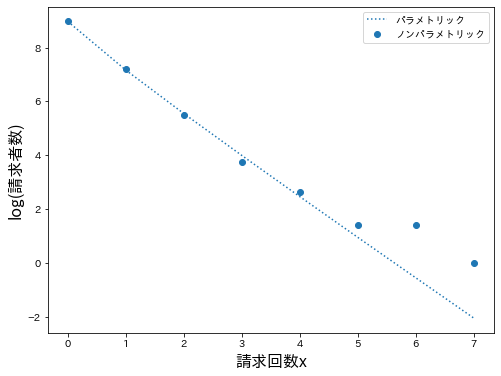

In [ ]:
x=[0,1,2,3,4,5,6,7]
N=9461
y_gam = [N*f(x,nu,sigma) for x in range(8)]
plt.figure(figsize=(8,6))
plt.scatter(x,np.log(y_x),marker='o',label='ノンパラメトリック')
plt.plot(x,np.log(y_gam),linestyle=':', label='パラメトリック')
plt.xlabel('請求回数x',fontsize=16)
plt.ylabel('log(請求者数)',fontsize=16)
plt.legend()

# 6.2

## 表6.2

In [ ]:
butterflies = pd.read_csv("/content/butterfly.txt", delimiter=" ", index_col="x")

In [ ]:
y = butterflies['y']

In [ ]:
y

x
1     118
2      74
3      44
4      24
5      29
6      22
7      20
8      19
9      20
10     15
11     12
12     14
13      6
14     12
15      6
16      9
17      9
18      6
19     10
20     10
21     11
22      5
23      3
24      3
Name: y, dtype: int64

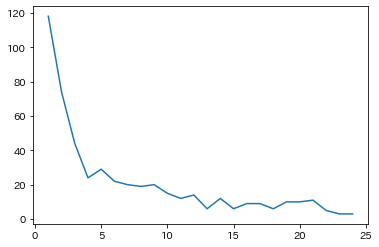

In [ ]:
x=range(1,25)
plt.plot(x,y)

## 表6.3

In [ ]:
index_ta = [i/10 for i in range(11)]

In [ ]:
def sd_(t):
  a = 0
  for i in range(1,25):
    a = a + y[i]*t**(2*i)
  return np.sqrt(a)

In [ ]:
sd_hat_list = [sd_(t/10) for t in range(11)]
sd_hat = pd.DataFrame({'sd(t) ' :sd_hat_list},index = index_ta)

In [ ]:
def Enonpara_(t):
  a = 0
  for i in range(1,25):
    a += -((-1)**i)*y[i]*(t**i)
  return a

In [ ]:
Enonpara_list = [Enonpara_(t/10) for t in range(11)]
Enonpara_hat = pd.DataFrame({'E(t)': Enonpara_list},index = index_ta)

In [ ]:
ta = pd.concat([Enonpara_hat,sd_hat],axis = 1)

In [ ]:
ta

In [ ]:
def Epara(t):
  nu = 0.104
  sigma = 89.79
  gamma = sigma/(1+ sigma)
  y_1 = y[1]
  return y_1*(1-(1+gamma*t)**(-nu))/(gamma*nu)

In [ ]:
Epara_list = [Epara(t/10) for t in range(11)]

In [ ]:
Epara_hat = pd.DataFrame( {'Epara(t)': Epara_list},index = index_ta)

In [ ]:
Epara_hat

## 図6.2

In [ ]:
x=index_ta
e_p = Epara_list
e_np = Enonpara_list
plt.plot(x,e_np,label='nonpara')
plt.plot(x,e_p,label='para')
plt.errorbar(x,e_np,yerr=sd_hat_list, capsize=3, ecolor='black', mfc='None')
plt.xlabel('時刻t')
plt.ylabel('$ \hat{E}(t)$')
plt.legend()

## 表6.4

In [ ]:
shakespeare = pd.read_csv("/content/shakespeare.txt", delimiter=" ", index_col="appeared")

In [ ]:
shakespeare

In [ ]:
y=shakespeare['count']

In [ ]:
def Enonpara_shake(t):
  a = 0
  for i in range(1,101):
    a += -((-1)**i)*y[i]*(t**i)
  return a

In [ ]:
Enonpara_shake(1)

In [ ]:
def sd_shake(t):
  a = 0
  for i in range(1,101):
    a = a + y[i]*t**(2*i)
  return np.sqrt(a)

In [ ]:
sd_shake(1)

In [ ]:
sum(y)

# 6.3

In [ ]:
nodes = pd.read_csv("/content/nodes.txt", delimiter=" ")

In [ ]:
nodes.head()

,n,x
0,26,0
1,14,14
2,34,3
3,25,2
4,23,5


In [ ]:
nodes['x'].value_counts()

0     322
1      83
2      73
3      53
4      41
5      38
7      29
9      25
6      20
11     19
8      19
10     12
12     12
13     11
15     11
14     10
16      8
17      7
20      7
19      7
24      5
25      4
23      4
18      4
21      4
29      3
28      2
32      2
26      2
22      1
27      1
34      1
69      1
36      1
31      1
40      1
Name: x, dtype: int64

In [ ]:
nodes['p'] = nodes['x']/nodes['n']

In [ ]:
nodes.head()

,n,x,p
0,26,0,0.00
1,14,14,1.00
2,34,3,0.09
3,25,2,0.08
4,23,5,0.22


## 図6.3

Text(0, 0.5, '度数')

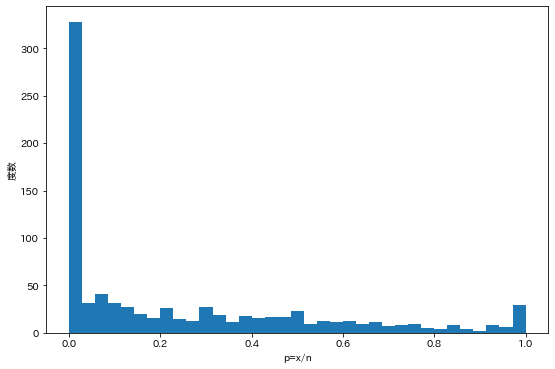

In [ ]:
plt.figure(figsize=(9,6))
plt.hist(nodes['p'],bins=35)
plt.xlabel('p=x/n')
plt.ylabel('度数')

(0.0, 100.0)

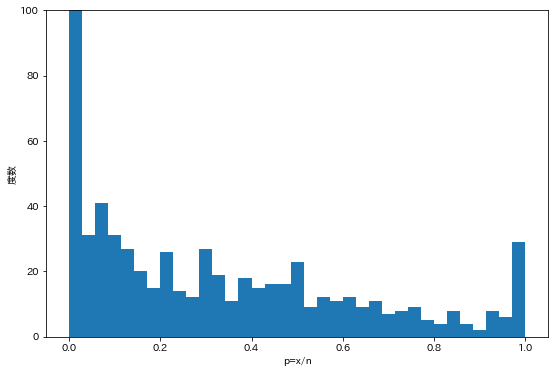

In [ ]:
plt.figure(figsize=(9,6))
plt.hist(nodes['p'],bins=35)
plt.xlabel('p=x/n')
plt.ylabel('度数')
plt.ylim(0,100)

## 図6.4

## 図6.5